# **Running R in a Colab notebook in Python**

- start colab notebook in Python as usual 
- to import R type:

In [1]:
%reload_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


- To mount your google drive type:

ps: click on the url link. allow to mount the drive then copy & paste the auth code

In [4]:
from google.colab import drive
drive.mount('/content/drive')

#drive.flush_and_unmount() at the end

Mounted at /content/drive


- type the magic command %%R to executed R code 

ps: %%R must be placed at the beginning of each cell you run R code

In [178]:
%%R
x <- seq(0, 10)
x

 [1]  0  1  2  3  4  5  6  7  8  9 10


In [180]:
%%R
A = matrix (c(1,2,3,4) ,2,2)
A

     [,1] [,2]
[1,]    1    3
[2,]    2    4


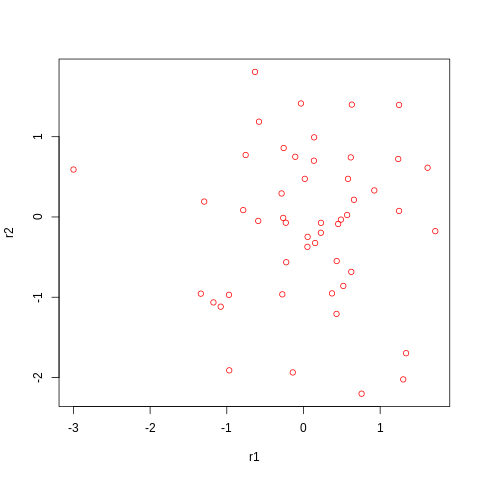

In [183]:
%%R
r1 = rnorm(50)
r2 = rnorm(50)
plot(r1,r2, col = "red")

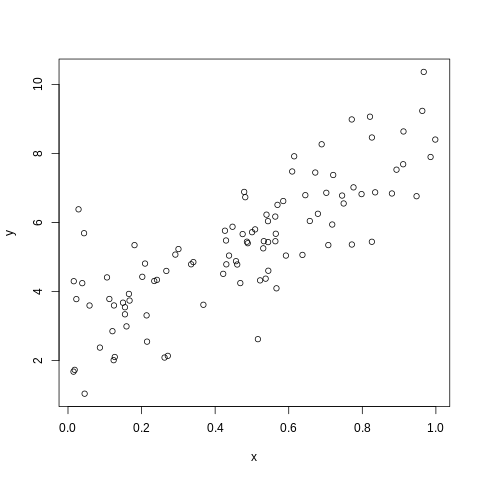

In [182]:
%%R
df <- tibble::tibble(
x = sort(runif(100)),
y = 5 * x + 0.5 * x ^ 2 + 3 + rnorm(length(x))
)
plot(df)

In [184]:
%%R
lmodel <- lm(y ~ x, data = df)
df %>% add_residuals(lmodel)

# A tibble: 100 x 3
        x     y  resid
    <dbl> <dbl>  <dbl>
 1 0.0150  1.68 -1.18 
 2 0.0157  4.30  1.43 
 3 0.0182  1.73 -1.15 
 4 0.0227  3.78  0.877
 5 0.0287  6.38  3.45 
 6 0.0388  4.24  1.25 
 7 0.0437  5.69  2.67 
 8 0.0452  1.04 -1.99 
 9 0.0586  3.60  0.495
10 0.0868  2.38 -0.878
# … with 90 more rows


- Read csv file from your drive with read.csv

- chech installed R packaged

We have already installed Data Science R packages: tidyverse, dyplr, ggplot2, modelr, stats, waldo, devtools

In [4]:
%%R
print(installed.packages())

             Package        LibPath                         Version   
IRdisplay    "IRdisplay"    "/usr/local/lib/R/site-library" "0.7.0"   
IRkernel     "IRkernel"     "/usr/local/lib/R/site-library" "1.1.1"   
pbdZMQ       "pbdZMQ"       "/usr/local/lib/R/site-library" "0.3-3.1" 
repr         "repr"         "/usr/local/lib/R/site-library" "1.1.0"   
uuid         "uuid"         "/usr/local/lib/R/site-library" "0.1-4"   
askpass      "askpass"      "/usr/lib/R/site-library"       "1.1"     
assertthat   "assertthat"   "/usr/lib/R/site-library"       "0.2.1"   
backports    "backports"    "/usr/lib/R/site-library"       "1.2.0"   
base64enc    "base64enc"    "/usr/lib/R/site-library"       "0.1-3"   
BH           "BH"           "/usr/lib/R/site-library"       "1.72.0-3"
blob         "blob"         "/usr/lib/R/site-library"       "1.2.1"   
brew         "brew"         "/usr/lib/R/site-library"       "1.0-6"   
brio         "brio"         "/usr/lib/R/site-library"       "1.1.0"   
broom 

In [179]:
%%R
#load the datasets

library(datasets)


In [49]:
%%R
#install new packages 

install.packages("ISLR")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ISLR_1.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1757568 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

- ##  Stock Market Data

S&P500 Stock index data from 2001 to 2005 is available as smarket dataset in ISLR

In [55]:
%%R
library("ISLR")


In [185]:
%%R

names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"


In [99]:
%%R
head(Smarket)

  Year   Lag1   Lag2   Lag3   Lag4   Lag5 Volume  Today Direction
1 2001  0.381 -0.192 -2.624 -1.055  5.010 1.1913  0.959        Up
2 2001  0.959  0.381 -0.192 -2.624 -1.055 1.2965  1.032        Up
3 2001  1.032  0.959  0.381 -0.192 -2.624 1.4112 -0.623      Down
4 2001 -0.623  1.032  0.959  0.381 -0.192 1.2760  0.614        Up
5 2001  0.614 -0.623  1.032  0.959  0.381 1.2057  0.213        Up
6 2001  0.213  0.614 -0.623  1.032  0.959 1.3491  1.392        Up


In [112]:
%%R
#predict the probability that the market will go up
#class labels: 0="Up" and 1="Down"
proba <-predict(logreg, type = "response")
proba[1:10]


        1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378 


In [119]:
%%R
dim(Smarket)

[1] 1250    9


In [143]:
%%R
Train-Test Spliting of Stock Market data
train = subset(x = Smarket, subset = Year < 2005)
test = subset(x =Smarket, subset=Year > 2005)


In [146]:
%%R
dim(train)

[1] 998   9


In [144]:
%%R

logreg <- glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=train,family = binomial())
summary(logreg)



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial(), data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3



In [147]:
%%R
coef(logreg)

 (Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
 0.191212621 -0.054178292 -0.045805334  0.007200118  0.006440875 -0.004222672 
      Volume 
-0.116256960 


In [148]:
%%R
# 95% CI for the coefficient estimates
confint(logreg)

R[write to console]: Waiting for profiling to be done...



                  2.5 %     97.5 %
(Intercept) -0.46299074 0.84720504
Lag1        -0.15617317 0.04713105
Lag2        -0.14777249 0.05558532
Lag3        -0.09416336 0.10859586
Lag4        -0.09506013 0.10793957
Lag5        -0.10464869 0.09612802
Volume      -0.58733257 0.35363815


In [154]:
%%R
#predict the probability that the market will go up or down

proba <-predict(logreg, subset=test, type = "response")
proba[1:10]



        1         2         3         4         5         6         7         8 
0.4985061 0.4893137 0.4849791 0.5098788 0.5145737 0.4982044 0.4835307 0.4984345 
        9        10 
0.5204107 0.4953121 



- Bayes Classifier: assigns a test observation to the most likely class, given predictors values (ie to the class for which
proba is largest)


- Here the numeric label encoding: 0="Up" and 1="Down", so Bayes Classifier:
corresponds to predicting "Up" if proba > 0.5, and "Down" otherwise.



In [170]:
%%R

pred=rep ("Down " ,998)# creates a 998 long vector with all values "Down"

pred[proba >.5]=" Up"

head(pred)


[1] "Down " "Down " "Down " " Up"   " Up"   "Down "


## Weekly Economic Index 

- WEI index of 10 daily and weekly indicators of real economic activity that is scaled to align with the four-quarter GDP growth rate. WEI dataset is available https://www.newyorkfed.org/research/policy/weekly-economic-index


In [189]:
%%R
#install new package

install.packages("gganimate")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘tweenr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tweenr_1.0.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 568185 bytes (554 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [192]:
%%R
library(gganimate)

R[write to console]: No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session

R[write to console]: 
Attaching package: ‘gganimate’


R[write to console]: The following object is masked from ‘package:ggvis’:

    view_static




In [210]:
%%R
data <- read.csv("/content/wei_data.csv",header=T)
summary(data)

       X             Month         Quarter           Week      
 Min.   :  0.0   Min.   :2008   Min.   :1.000   Min.   : 1.00  
 1st Qu.:160.5   1st Qu.:2011   1st Qu.:1.000   1st Qu.:13.00  
 Median :321.0   Median :2014   Median :2.000   Median :26.00  
 Mean   :321.0   Mean   :2014   Mean   :2.024   Mean   :26.12  
 3rd Qu.:481.5   3rd Qu.:2017   3rd Qu.:3.000   3rd Qu.:39.00  
 Max.   :642.0   Max.   :2020   Max.   :3.000   Max.   :53.00  
                                NA's   :602                    
      WEI         
 Min.   :-11.580  
 1st Qu.:  1.445  
 Median :  2.060  
 Mean   :  1.565  
 3rd Qu.:  2.425  
 Max.   :  4.590  
                  


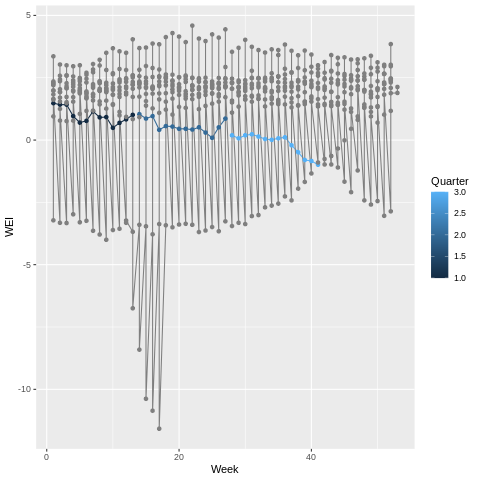

In [224]:
%%R


ggplot(data=data, aes(x=Week, y=WEI, group=Quarter, colour=Quarter)) + geom_line() + geom_point()

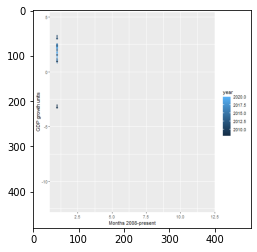

In [230]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/gdp.gif")
plt.imshow(img)

